In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Cell 2: Load the dataset (sampling for efficiency)
print("Loading dataset... This may take a few minutes...")

# Load only a sample of 200,000 rows for faster analysis
df = pd.read_csv('US_Accidents_March23.csv', nrows=200000)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Using {df.shape[0]:,} accident records for analysis")



Loading dataset... This may take a few minutes...
Dataset loaded successfully!
Shape: (200000, 46)
Using 200,000 accident records for analysis


In [3]:
# Cell 3: Check the data
print("\nFirst few rows:")
df.head()



First few rows:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:

# Cell 4: Basic information
print("Dataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     200000 non-null  object 
 1   Source                 200000 non-null  object 
 2   Severity               200000 non-null  int64  
 3   Start_Time             200000 non-null  object 
 4   End_Time               200000 non-null  object 
 5   Start_Lat              200000 non-null  float64
 6   Start_Lng              200000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           200000 non-null  float64
 10  Description            200000 non-null  object 
 11  Street                 200000 non-null  object 
 12  City                   199986 non-null  object 
 13  County                 200000 non-null  object 
 14  State                 

In [5]:
# Cell 5: Check columns
print("\nColumn names:")
print(df.columns.tolist())



Column names:
['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [6]:
# Cell 6: Basic statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,200000.000000,200000.000000,200000.000000,0.0,0.0,200000.000000,197165.00000,21390.000000,196757.000000,197797.000000,196737.000000,161560.000000,18352.000000
mean,2.410060,35.402579,-104.355926,NaN,NaN,0.033965,65.68728,30.399621,63.903195,30.001038,9.281449,8.512051,0.057414
std,0.494724,4.582634,17.870632,NaN,NaN,0.535451,16.43741,19.850108,21.603255,0.271988,1.991511,6.313318,0.493516
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-13.00000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.754379,-118.437279,NaN,NaN,0.000000,57.00000,19.200000,50.000000,29.910000,10.000000,5.000000,0.000000
50%,2.000000,34.120522,-117.370598,NaN,NaN,0.000000,66.90000,30.300000,66.000000,30.000000,10.000000,8.100000,0.000000
75%,3.000000,38.514824,-83.764334,NaN,NaN,0.010000,77.00000,38.800000,81.000000,30.100000,10.000000,10.400000,0.030000
max,4.000000,44.895218,-70.590034,NaN,NaN,80.890000,132.60000,111.000000,100.000000,33.040000,80.000000,822.800000,10.140000


In [7]:
# Cell 7: Check missing values
print("\nMissing values per column:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))


Missing values per column:
                       Missing  Percentage
End_Lat                 200000    100.0000
End_Lng                 200000    100.0000
Precipitation(in)       181648     90.8240
Wind_Chill(F)           178610     89.3050
Wind_Speed(mph)          38440     19.2200
Visibility(mi)            3263      1.6315
Humidity(%)               3243      1.6215
Temperature(F)            2835      1.4175
Weather_Condition         2788      1.3940
Pressure(in)              2203      1.1015
Wind_Direction            1556      0.7780
Weather_Timestamp         1543      0.7715
Airport_Code                30      0.0150
Zipcode                     30      0.0150
Timezone                    30      0.0150
City                        14      0.0070
Sunrise_Sunset              14      0.0070
Civil_Twilight              14      0.0070
Nautical_Twilight           14      0.0070
Astronomical_Twilight       14      0.0070



Accident Severity Distribution:
Severity
1       154
2    117810
3     81906
4       130
Name: count, dtype: int64


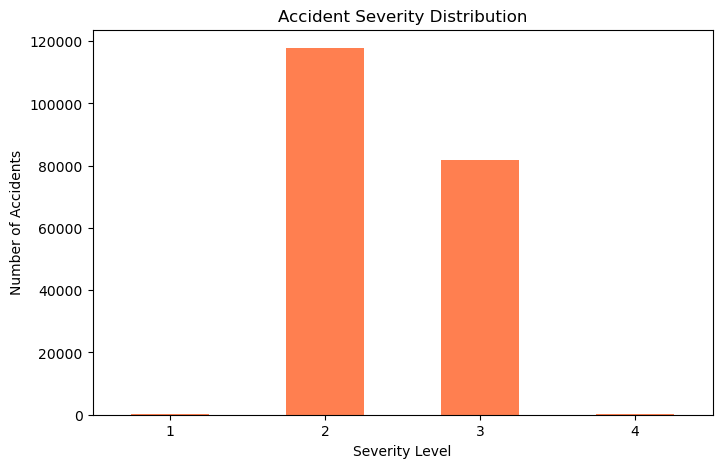

In [8]:
# Cell 8: Accident severity distribution
print("\nAccident Severity Distribution:")
print(df['Severity'].value_counts().sort_index())

plt.figure(figsize=(8, 5))
df['Severity'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()


In [9]:
# Cell 9: Extract time features
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract useful time features
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['WeekDay'] = df['Start_Time'].dt.dayofweek

print("Time features extracted successfully!")


Time features extracted successfully!



Accidents by Hour of Day:
Hour
0      2755
1      2371
2      2335
3      1871
4      2726
5      3566
6      6046
7     10421
8     12893
9     12617
10    14008
11    14406
12    12206
13     9483
14    10170
15     9506
16    11395
17    11824
18    12208
19    11714
20    11451
21     6624
22     5159
23     2245
Name: count, dtype: int64


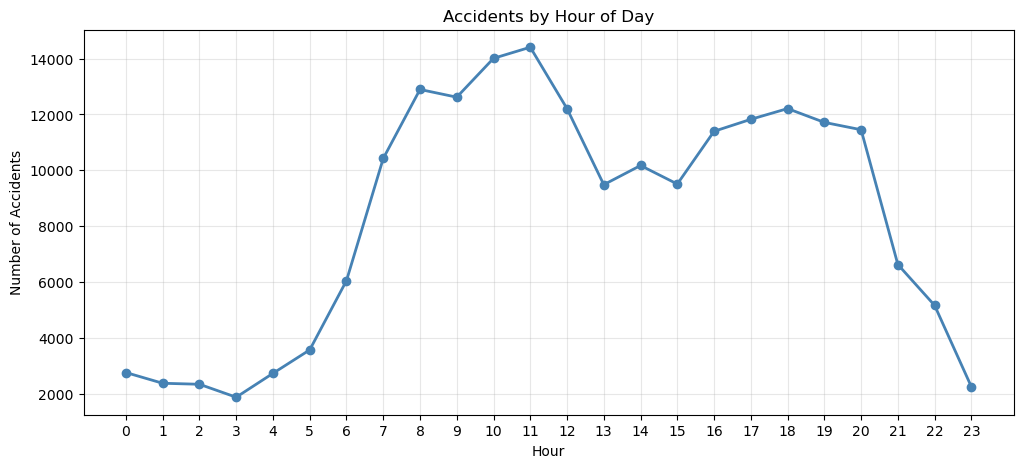

In [10]:
# Cell 10: Accidents by hour of day
print("\nAccidents by Hour of Day:")
hourly_accidents = df['Hour'].value_counts().sort_index()
print(hourly_accidents)

plt.figure(figsize=(12, 5))
hourly_accidents.plot(kind='line', marker='o', linewidth=2, color='steelblue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()


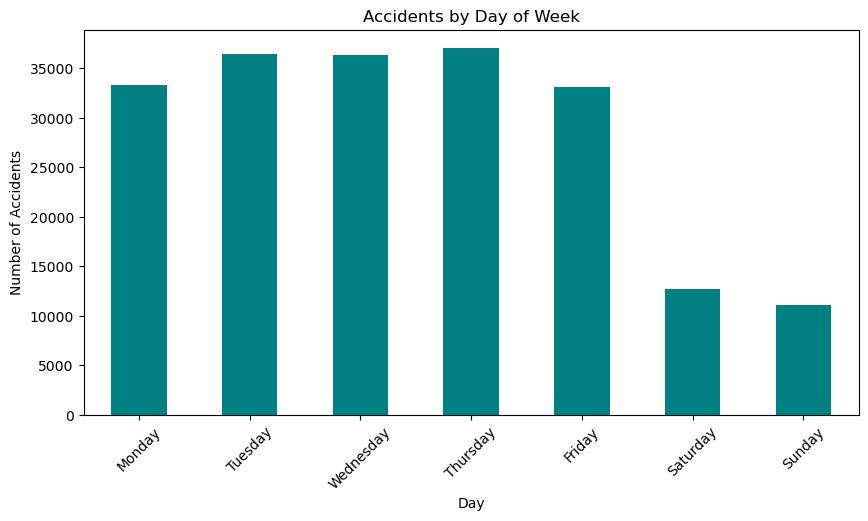

In [11]:
# Cell 11: Accidents by day of week
plt.figure(figsize=(10, 5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
day_counts.plot(kind='bar', color='teal')
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

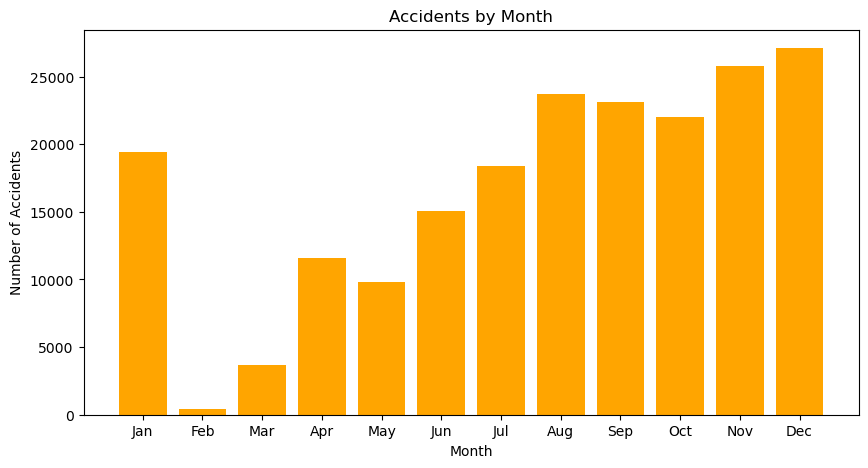

In [12]:
# Cell 12: Accidents by month
plt.figure(figsize=(10, 5))
month_counts = df['Month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), [month_counts.get(i, 0) for i in range(1, 13)], color='orange')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), month_names)
plt.show()


Top 10 Cities with Most Accidents:
City
Los Angeles     12727
Atlanta          5894
Sacramento       5223
Omaha            4925
Orlando          4892
San Diego        4074
Miami            3768
Grand Rapids     3173
San Jose         3026
Flint            2679
Name: count, dtype: int64


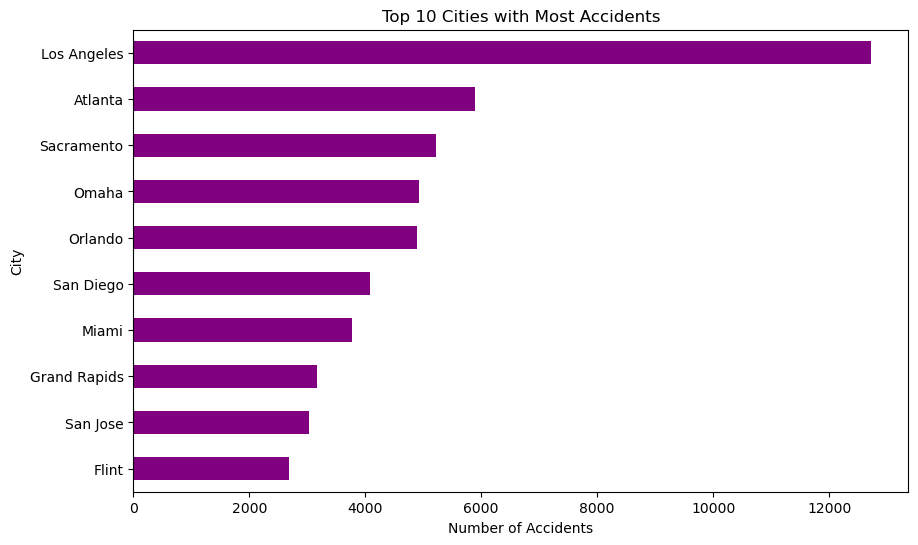

In [13]:
# Cell 13: Top 10 cities with most accidents
print("\nTop 10 Cities with Most Accidents:")
top_cities = df['City'].value_counts().head(10)
print(top_cities)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='barh', color='purple')
plt.title('Top 10 Cities with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.show()


Top 10 States with Most Accidents:
State
CA    115327
FL     30200
MI     15330
GA     11508
IL     10385
NE      5898
NY      3115
SC      2243
IA      1421
MA      1181
Name: count, dtype: int64


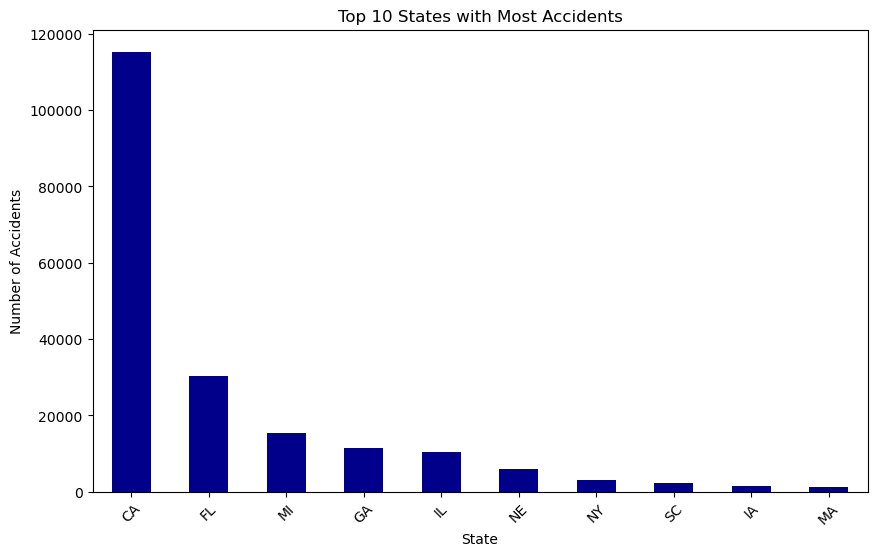

In [14]:
# Cell 14: Top 10 states with most accidents
print("\nTop 10 States with Most Accidents:")
top_states = df['State'].value_counts().head(10)
print(top_states)

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='darkblue')
plt.title('Top 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


Top Weather Conditions during Accidents:
Weather_Condition
Clear               94476
Overcast            26454
Mostly Cloudy       23197
Partly Cloudy       17883
Scattered Clouds    16833
Light Rain           7046
Haze                 3213
Light Snow           1504
Fair                 1489
Rain                 1488
Name: count, dtype: int64


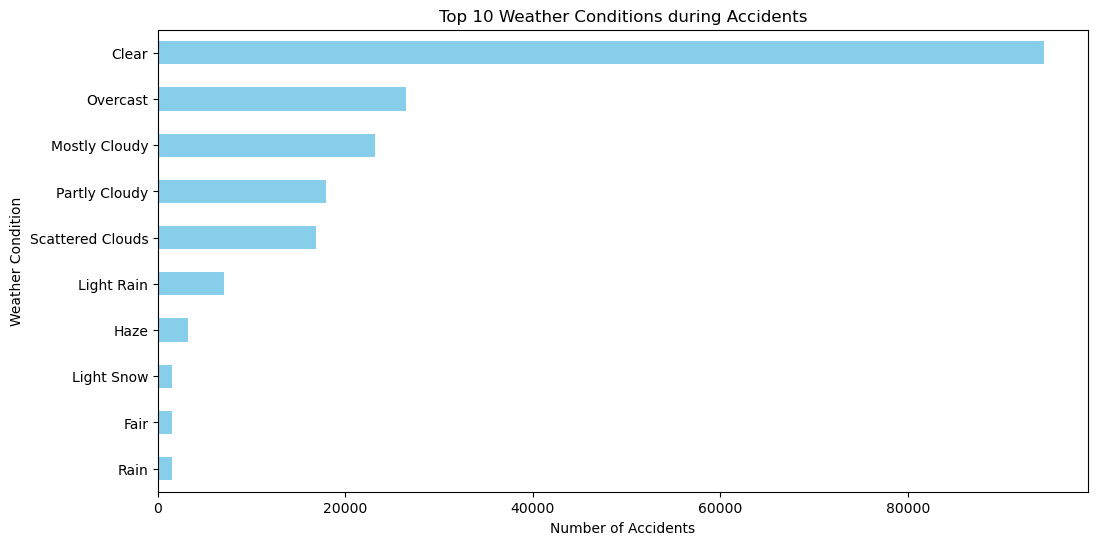

In [15]:
# Cell 15: Weather condition analysis
print("\nTop Weather Conditions during Accidents:")
if 'Weather_Condition' in df.columns:
    weather_counts = df['Weather_Condition'].value_counts().head(10)
    print(weather_counts)
    
    plt.figure(figsize=(12, 6))
    weather_counts.plot(kind='barh', color='skyblue')
    plt.title('Top 10 Weather Conditions during Accidents')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Weather Condition')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Weather_Condition column not found")



Temperature Statistics during Accidents:
count    197165.00000
mean         65.68728
std          16.43741
min         -13.00000
25%          57.00000
50%          66.90000
75%          77.00000
max         132.60000
Name: Temperature(F), dtype: float64


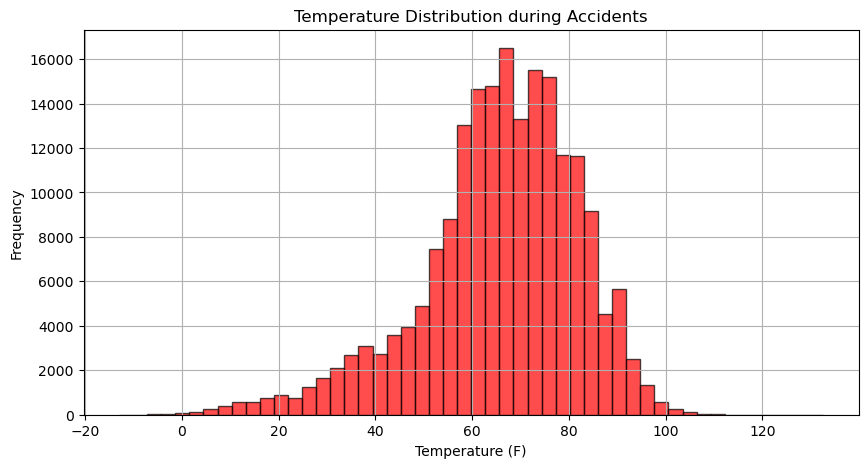

In [16]:
# Cell 16: Temperature analysis
if 'Temperature(F)' in df.columns:
    print("\nTemperature Statistics during Accidents:")
    print(df['Temperature(F)'].describe())
    
    plt.figure(figsize=(10, 5))
    df['Temperature(F)'].dropna().hist(bins=50, color='red', alpha=0.7, edgecolor='black')
    plt.title('Temperature Distribution during Accidents')
    plt.xlabel('Temperature (F)')
    plt.ylabel('Frequency')
    plt.show()



Visibility Statistics during Accidents:
count    196737.000000
mean          9.281449
std           1.991511
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          80.000000
Name: Visibility(mi), dtype: float64


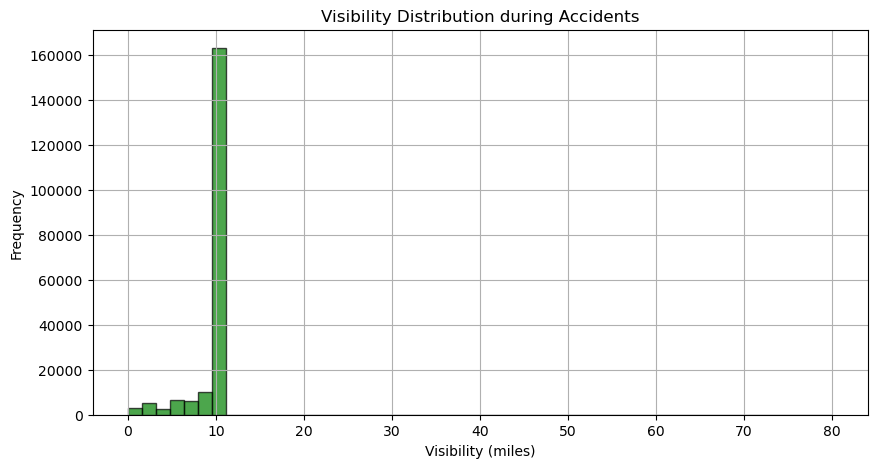

In [17]:
# Cell 17: Visibility analysis
if 'Visibility(mi)' in df.columns:
    print("\nVisibility Statistics during Accidents:")
    print(df['Visibility(mi)'].describe())
    
    plt.figure(figsize=(10, 5))
    df['Visibility(mi)'].dropna().hist(bins=50, color='green', alpha=0.7, edgecolor='black')
    plt.title('Visibility Distribution during Accidents')
    plt.xlabel('Visibility (miles)')
    plt.ylabel('Frequency')
    plt.show()



Accidents by Time of Day:
TimeOfDay
Morning      70391
Afternoon    52760
Evening      47197
Night        29652
Name: count, dtype: int64


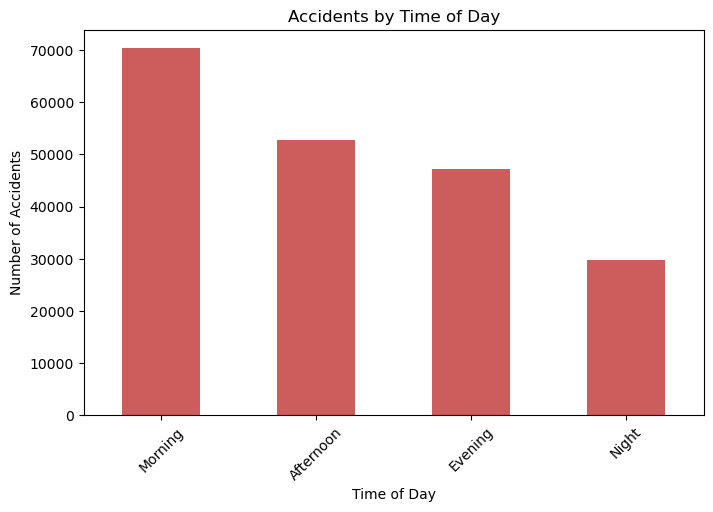

In [18]:
# Cell 18: Time of day categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(categorize_time)

print("\nAccidents by Time of Day:")
time_counts = df['TimeOfDay'].value_counts()
print(time_counts)

plt.figure(figsize=(8, 5))
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_counts.reindex(time_order).plot(kind='bar', color='indianred')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


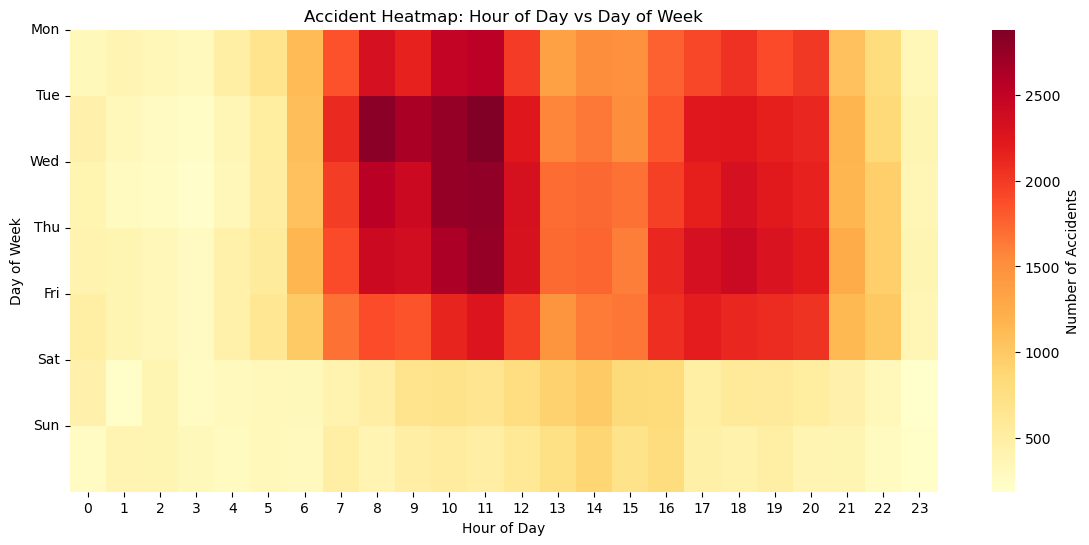

In [19]:
# Cell 19: Heatmap - Hour vs Day of Week
pivot_table = df.groupby(['WeekDay', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', cbar_kws={'label': 'Number of Accidents'})
plt.title('Accident Heatmap: Hour of Day vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.yticks(range(7), day_labels, rotation=0)
plt.show()



Road Features Present during Accidents:
Traffic_Signal     37956
Crossing           25326
Junction           14009
Station             7114
Stop                5446
Railway             2001
Amenity             1848
Give_Way             410
No_Exit              284
Traffic_Calming      159
Bump                  57
Roundabout             7
Turning_Loop           0
dtype: int64


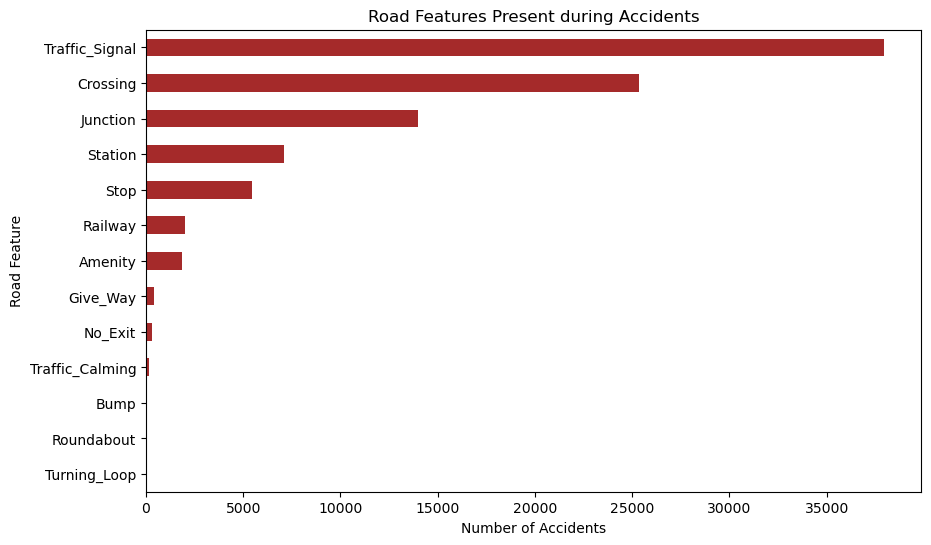

In [20]:
# Cell 20: Road features analysis
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

available_features = [f for f in road_features if f in df.columns]

if available_features:
    print("\nRoad Features Present during Accidents:")
    feature_counts = df[available_features].sum().sort_values(ascending=False)
    print(feature_counts)
    
    plt.figure(figsize=(10, 6))
    feature_counts.plot(kind='barh', color='brown')
    plt.title('Road Features Present during Accidents')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Road Feature')
    plt.gca().invert_yaxis()
    plt.show()


<Figure size 1000x600 with 0 Axes>

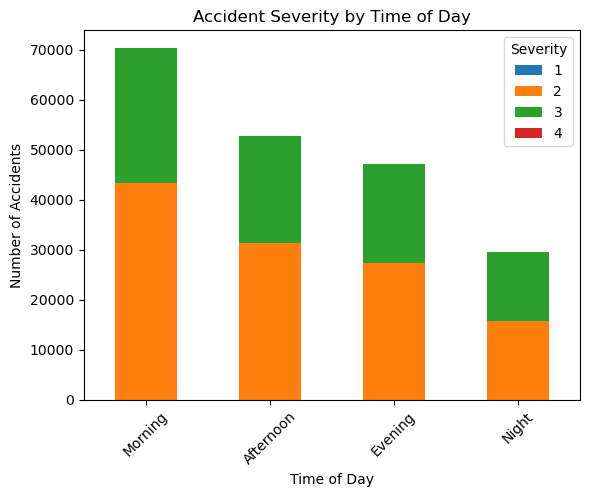

In [21]:
# Cell 21: Severity by time of day
plt.figure(figsize=(10, 6))
severity_time = df.groupby(['TimeOfDay', 'Severity']).size().unstack(fill_value=0)
severity_time.reindex(time_order).plot(kind='bar', stacked=True)
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Cell 22: Summary statistics
print("\n" + "="*60)
print("ANALYSIS SUMMARY")
print("="*60)
print(f"\nTotal Accidents Analyzed: {len(df):,}")
print(f"Date Range: {df['Start_Time'].min()} to {df['Start_Time'].max()}")
print(f"\nMost Dangerous Hour: {hourly_accidents.idxmax()}:00")
print(f"Most Dangerous Day: {df['DayOfWeek'].value_counts().idxmax()}")
print(f"Most Dangerous Month: {month_names[month_counts.idxmax()-1]}")
print(f"Most Affected City: {df['City'].value_counts().idxmax()}")
print(f"Most Affected State: {df['State'].value_counts().idxmax()}")
print(f"\nAverage Severity: {df['Severity'].mean():.2f}")
print(f"Most Common Severity: {df['Severity'].mode()[0]}")

if 'Weather_Condition' in df.columns:
    print(f"Most Common Weather: {df['Weather_Condition'].value_counts().idxmax()}")

print("\n" + "="*60)
print("Analysis Complete!")
print("="*60)


ANALYSIS SUMMARY

Total Accidents Analyzed: 200,000
Date Range: 2016-02-08 05:46:00 to 2017-01-26 20:07:03

Most Dangerous Hour: 11:00
Most Dangerous Day: Thursday
Most Dangerous Month: Dec
Most Affected City: Los Angeles
Most Affected State: CA

Average Severity: 2.41
Most Common Severity: 2
Most Common Weather: Clear

Analysis Complete!
